In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


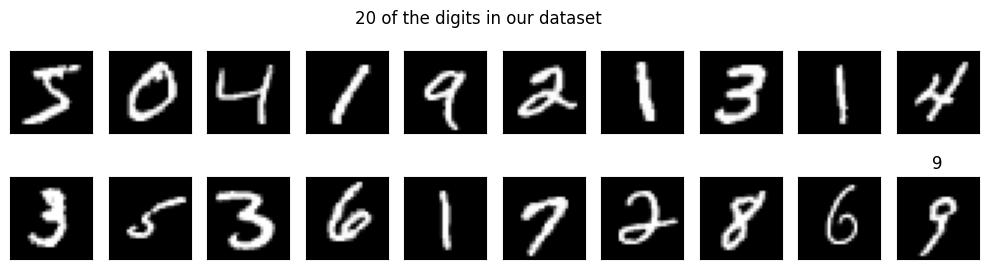

In [4]:
fig = plt.figure(figsize=(12.5, 3))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  ax.imshow(x_train[idx], cmap="gray")
  
ax.set_title(str(y_train[idx]))
fig.suptitle("20 of the digits in our dataset")
plt.show()

Label of the randomly selected image: 9


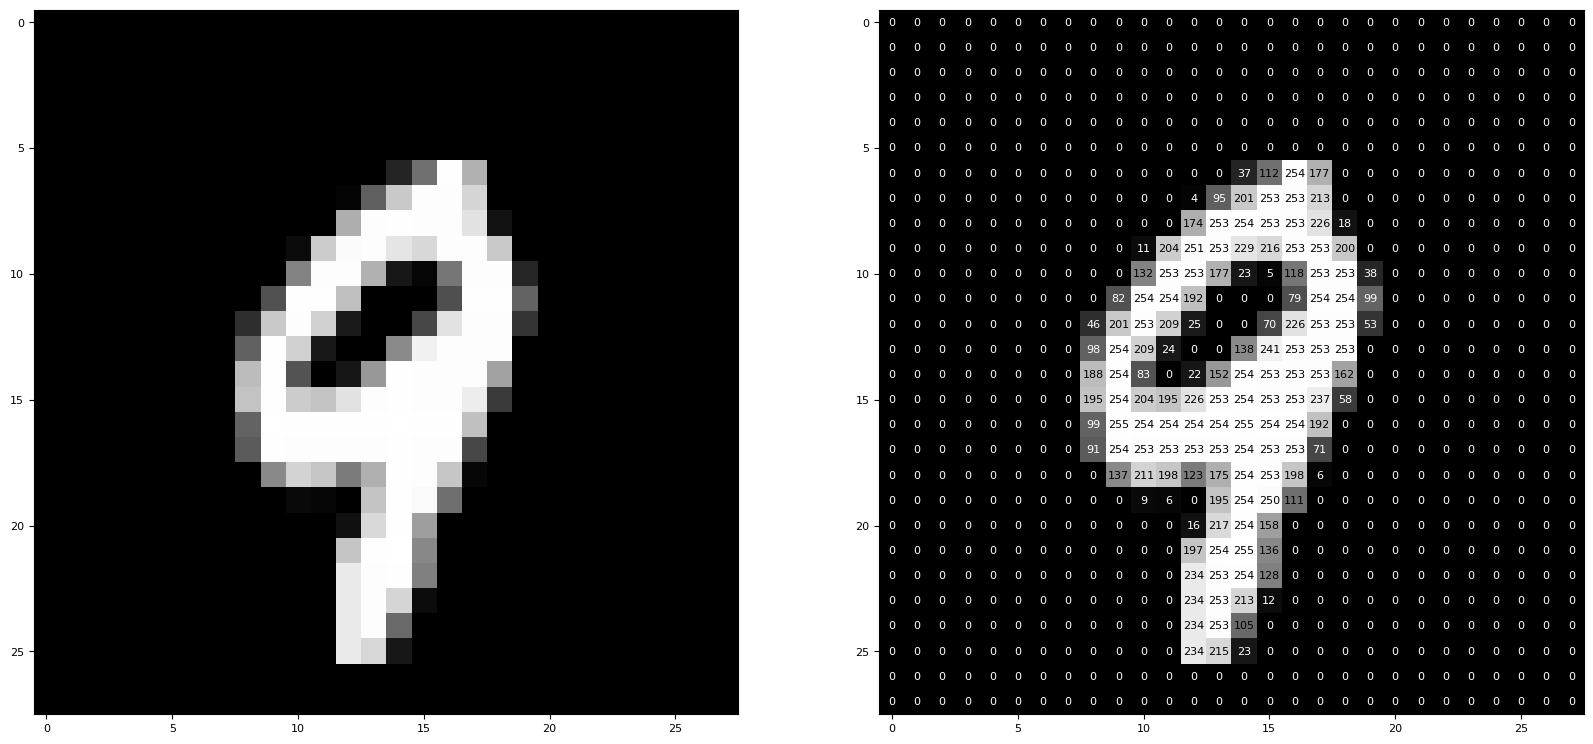

In [5]:
plt.rcParams.update({"font.size":8})

rnd = random.randint(0, len(x_train) - 1)
img = x_train[rnd]
ground_truth = y_train[rnd]

plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")

ax = plt.subplot(1,2,2)
ax.imshow(img, cmap="gray")
width, height = img.shape
thrs = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y], 2) if img[x][y] != 0 else 0
        ax.annotate(str(val), xy = (y, x),
                                horizontalalignment = "center",
                                verticalalignment = "center",
                                color = "white" if img[x][y] < thrs else "black")

print(f"Label of the randomly selected image: {ground_truth}")
plt.show()

In [6]:
print(f"Shape of x_train before reshaping: {x_train.shape}\n"
      f"Maximum value of an entry: {x_train[rnd].max()}\n"
      f"Shape of a single image/input vector: {x_train[rnd].shape}")

x_train = x_train.reshape((-1, 28 * 28)).astype("float32") / 255
x_test = x_test.reshape((-1, 28 * 28)).astype("float32") / 255

print(f"Shape of the data after reshaping: {x_train.shape}\n"
      f"Maximum value of an entry: {x_train[rnd].max()}\n")

Shape of x_train before reshaping: (60000, 28, 28)
Maximum value of an entry: 255
Shape of a single image/input vector: (28, 28)
Shape of the data after reshaping: (60000, 784)
Maximum value of an entry: 1.0



In [7]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
print(f"One-hot encoded label: \n{y_train[rnd]}\n"
      f"Ground Truth / Label: {ground_truth}")

One-hot encoded label: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Ground Truth / Label: 9


In [8]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy", 
    patience=10
)

In [9]:
input_layer_size = 28 * 28
first_layer_size = 256
second_layer_size = 128
output_layer_size = 10

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(first_layer_size, activation="relu", input_shape=(input_layer_size,)), 
    tf.keras.layers.Dense(second_layer_size, activation="relu"),
    tf.keras.layers.Dense(output_layer_size, activation="softmax")
])

c:\Users\gutsc\Documents\Second_Brain\Quartz\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [12]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
history = model.fit(
    x_train, 
    y_train, 
    epochs=50, 
    batch_size=128, 
    callbacks=[callback], 
    validation_split=0.2, 
    verbose=0
)

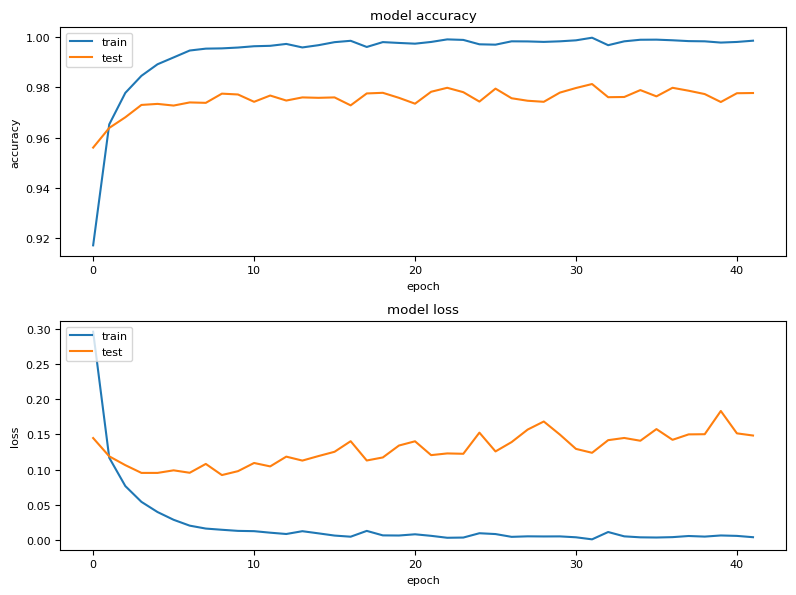

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot 1
ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_title("model accuracy")
ax1.set_ylabel("accuracy")
ax1.set_xlabel("epoch")
ax1.legend(["train", "test"], loc="upper left")

# Plot 2
ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_title("model loss")
ax2.set_ylabel("loss")
ax2.set_xlabel("epoch")
ax2.legend(["train", "test"], loc="upper left")

plt.tight_layout()
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9813 - loss: 0.1155
Test accuracy: 0.9812999963760376


In [16]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(first_layer_size, activation="relu", input_shape=(input_layer_size,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(second_layer_size, activation="relu"),
    tf.keras.layers.Dense(output_layer_size, activation="softmax")
])

In [17]:
model2.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [18]:
print(model2.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
history = model2.fit(
    x_train, 
    y_train,
    epochs=50, 
    batch_size=128, 
    callbacks=[callback], 
    validation_split=0.2, 
    verbose=0
)

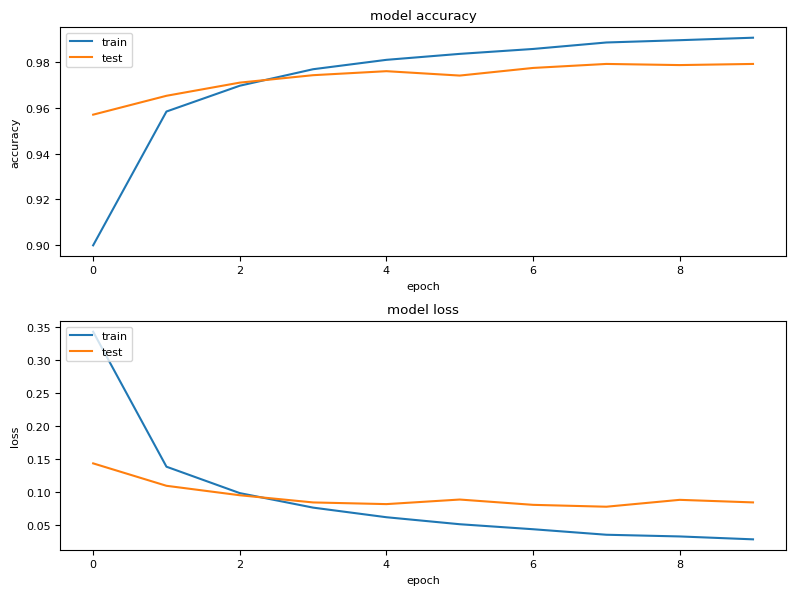

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot 1
ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_title("model accuracy")
ax1.set_ylabel("accuracy")
ax1.set_xlabel("epoch")
ax1.legend(["train", "test"], loc="upper left")

# Plot 2
ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_title("model loss")
ax2.set_ylabel("loss")
ax2.set_xlabel("epoch")
ax2.legend(["train", "test"], loc="upper left")

plt.tight_layout()
plt.show()

In [21]:
test_loss, test_acc = model2.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9799 - loss: 0.0746
Test accuracy: 0.9799000024795532


confusion matrix

In [22]:
y_pred = model2.predict(x_test)

print(
    f"y_pred shape: {y_pred.shape}\n"
    f"y_test shape: {y_test.shape}"
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step
y_pred shape: (10000, 10)
y_test shape: (10000, 10)


In [23]:
print(
    f"Array: {y_pred[1]}\n"
    f"Max. value: {np.max(y_pred[1])}\n"
    f"Position of max. value: {np.argmax(y_pred[1])}"
)

Array: [5.9272652e-12 9.0689161e-07 9.9999750e-01 1.5638241e-06 8.4038764e-17
 1.2675554e-12 2.7229085e-12 3.0766105e-11 1.3155010e-10 1.4530738e-16]
Max. value: 0.9999974966049194
Position of max. value: 2


In [24]:
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

labels = np.arange(10)

plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix - MNIST")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")


thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], "d"),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'sklearn'